# Meteorites Landing Data Analysis

1. Retrive the data by calling NASA api
2. Add Country Code, Country Name and City Name
3. Save the Meteorites Landing Data to fine "meteorites_landing_raw_data.csv" file for the cleaning process

In [19]:
#Dependencies
import csv
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [ ]:
from meteorites_data_retriever import meteorites_data_retriever


In [ ]:
from meteorites_data_cleaner import meteorites_data_cleaner

### meteorites data retrieving process

In [ ]:
#meteorites_raw_data = meteorites_data_retriever()
#meteorites_data.head()


### meteorites data cleaning process




In [ ]:
#meteorites_data = meteorites_data_cleaner()


In [4]:
#Read server list from CSV file
meteorites_df = pd.read_csv('./Resources/meteorites_cleaned_data.csv')
meteorites_df.count()

Unnamed: 0         31672
Unnamed: 0.1       31672
name               31672
id                 31672
mass               31672
fall               31672
reclat             31672
reclong            31672
geolocation        31672
country_code       31672
country_name       31672
city_name          31672
continent_name     31672
material_column    31672
years              31672
dtype: int64

### Plot meteorites fall density by continent_name

In [5]:
def plot_meteorites_fall_density():
    # Generate a pie plot showing the distribution of meteorites fall
    met_df = meteorites_df.groupby(["continent_name"]).count()
    met_df = met_df.reset_index()
    #Draw Pie chart
    mice_pie = met_df.plot.pie(y='id',labels=met_df['continent_name'], 
                               figsize=(5,5),autopct='%1.1f%%', title=("Meteorites fall Density Index")) 
    mice_pie.set_ylabel("Continent Name")

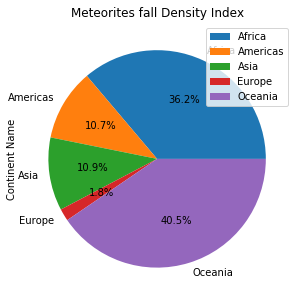

In [6]:
plot_meteorites_fall_density()

### Plot meteorites fall by year

In [7]:
def plot_meteorites_fall_by_year():
    #How many meteorites hit Earth each year?
    # Generate a bar plot showing number of data points for each treatment regimen using pandas

    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','years'])

    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)


    met_df = meterorite_data.groupby(["year"]).count()
    met_df.head(100)
    met_df = met_df.reset_index()
    met_df = met_df[met_df['year'] > '1950']


    met_df.plot.bar(x='year', y='id', facecolor="red", alpha=0.75, align="center", figsize=(20,5))
    plt.title("How many meteorites hit Earth each year")
    plt.xlabel('Drug Regimen')
    plt.ylabel('Tumor Volume (mm3)')
    plt.tight_layout()
    plt.show()

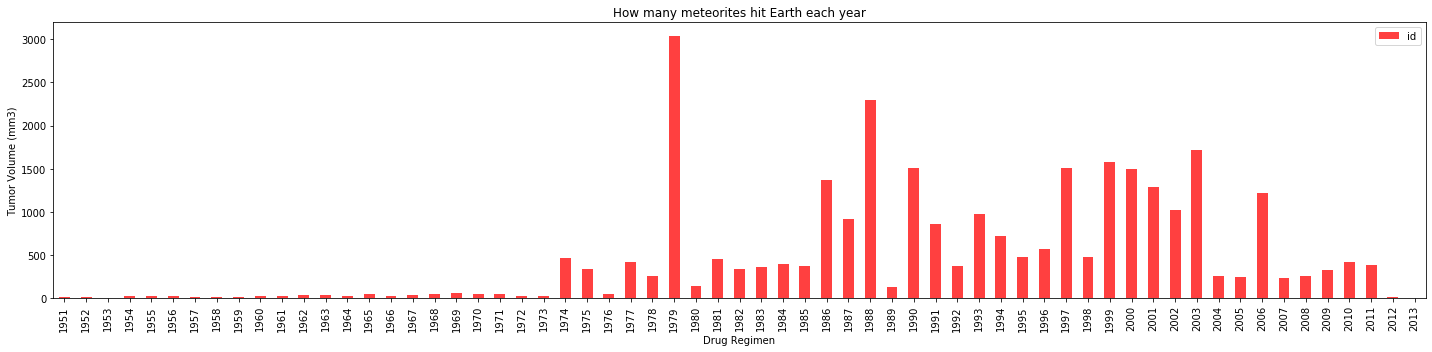

In [8]:
plot_meteorites_fall_by_year()

### Meteorites fall trend by year

In [9]:
#How many meteorites hit Earth each year?
def plot_meteorites_fall_by_year():
    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','years'])
    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)
    meterorite_data = meterorite_data[meterorite_data['year'] > '2000']
    met_df_year_count = meterorite_data.groupby(["year"])['id'].count()
    met_df_year_count = met_df_year_count.reset_index()
    plt.scatter(met_df_year_count.year, met_df_year_count.id, s=30, alpha=0.75)

    # Set a title for the chart
    plt.title("Meteorites fall trend by year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()
    plt.tight_layout()

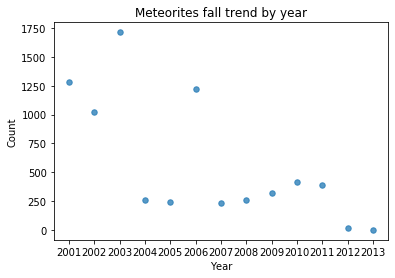

<Figure size 432x288 with 0 Axes>

In [10]:
plot_meteorites_fall_by_year()

### How many meteorites hit Earth each year by Location

In [17]:
#How many meteorites hit Earth each year by Location?
def plot_meteorites_fall_by_geography(meteorites_df):
    meterorite_data = pd.DataFrame(meteorites_df, columns = ['years','country_code'])
    meterorite_data['country_code2'] = meterorite_data['country_code'].str.split("-", n = 1, expand = True)
    met_df_geo_count = meterorite_data.groupby(["years"])['country_code'].count()
    met_df_geo_count = met_df_geo_count.reset_index()
    plt.scatter(met_df_geo_count.years, met_df_geo_count.country_code, s=30, alpha=0.75)

    # Set a title for the chart
    plt.title("Meteorites fall trend by geography")
    plt.xlabel("country_code")
    plt.ylabel("Count")
    plt.show()
    plt.tight_layout()

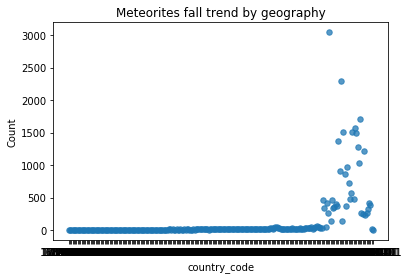

<Figure size 432x288 with 0 Axes>

In [18]:
plot_meteorites_fall_by_geography(meteorites_df)

### biggest_meteorites_by_type

In [20]:
def biggest_meteorites_by_type():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df .groupby('material_column')['mass'].mean()
    df_crunch.head()
#df_crunch['large']
    df_crunch['count'] = meteorites_df .groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    df_crunch.head()
    df_crunch['material'] = df_crunch.index
    df_crunch.head(10)
    df_large = df_crunch['size'] > 200000
    df_crunch[df_large].plot.bar(x='material', y='size', facecolor="darkgreen", alpha=0.75, align="center", figsize=(20,5))
    plt.title("Largest average mass size by material")
    plt.xlabel('Meterorite Material')
    plt.ylabel('Mass (grams)')
    plt.tight_layout()
    plt.show()

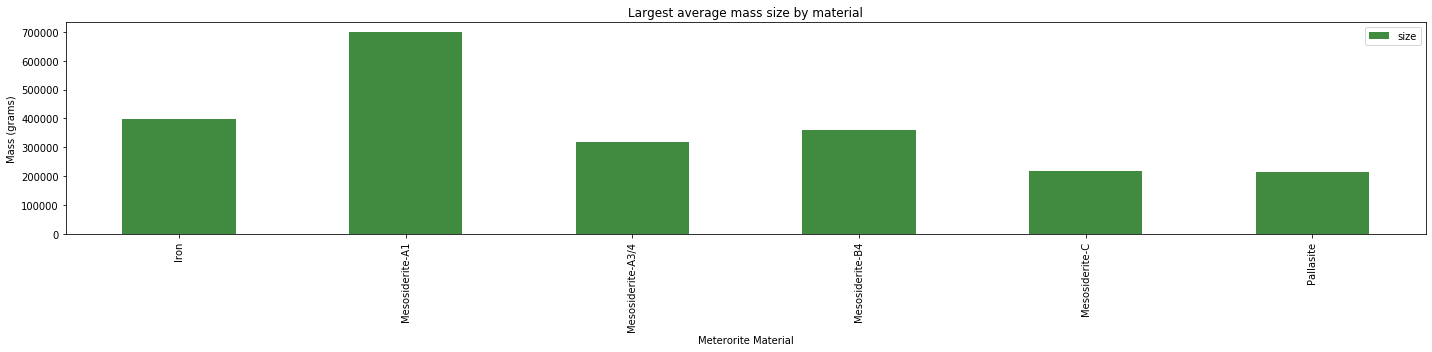

In [21]:
biggest_meteorites_by_type()

### scatterplot by size and kind

In [22]:
def scatterplot_size_kind():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df.groupby('material_column')['mass'].mean()
    df_crunch.head()
#df_crunch['large']
    df_crunch['count'] = meteorites_df.groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    df_crunch.head()
    df_crunch['material'] = df_crunch.index
    ax = df_crunch.plot(kind='scatter', x='count', y='size')
    ax.set_xlabel("Meteorite count grouped by material")
    # Set the y-axis label
    ax.set_ylabel("Meteorite size grouped by type")
    #df_crunch.plot.scatter(x='count', y='size')

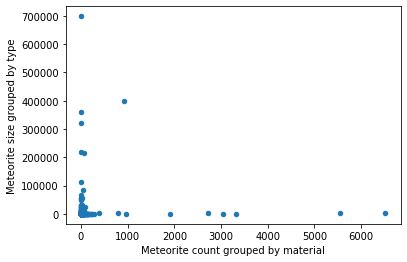

In [23]:
scatterplot_size_kind()

### Percetage of Rare and Large Meteorites

In [24]:
def pie_largest_fewest():
    df_crunch = pd.DataFrame()
    df_crunch['size'] = meteorites_df.groupby('material_column')['mass'].mean()
    df_crunch.head()
    #df_crunch['large']
    df_crunch['count'] = meteorites_df.groupby('material_column')['mass'].count()#.sort_values(ascending=False)#.plt.scatter()#(by='mass_in_grams',ascending=False)
    df_crunch.sort_values(by='size', ascending=False)
    #df_crunch.head()
    df_large_and_infrequent = (df_crunch['count'] < 250) & (df_crunch['size'] > 200000)
    met_pie = df_crunch[df_large_and_infrequent].plot.pie(y='count',labels=df_crunch[df_large_and_infrequent].index, 
                          figsize=(5,5),autopct='%1.1f%%', title=("Percetage of Rare and Large Meteorites")) 
    met_pie.set_ylabel("Material")

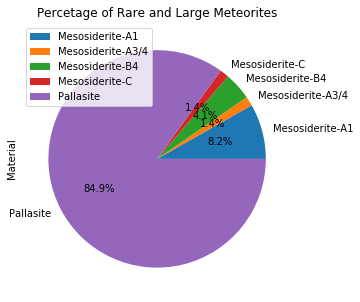

In [25]:
pie_largest_fewest()

### Distribution of meteorites fall by country

In [41]:
def distribution_of_meteorites_fall_country():
    met_data = pd.DataFrame(meteorites_df, columns = ['id','country_name'])
    de = met_data['country_name'].value_counts()[:10]
    de.plot(kind='barh', facecolor="blue",figsize=(13,6))
    plt.title('Location of all meteorites with their count', fontsize=15)
    plt.show()


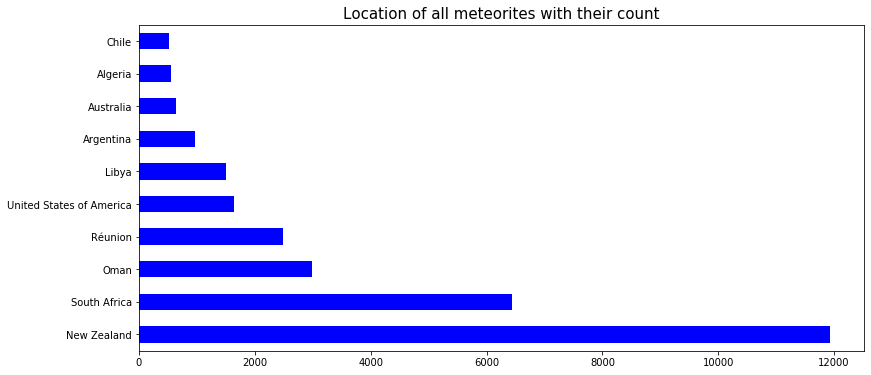

In [42]:
distribution_of_meteorites_fall_country()

### Meteorites fall Density Index

In [37]:
def fall_vs_found():
    # Generate a pie plot showing the distribution of meteorites fall
    met_df = meteorites_df.groupby(["fall"]).count()
    met_df = met_df.reset_index()
    #Draw Pie chart
    mice_pie = met_df.plot.pie(y='id',labels=met_df['continent_name'], 
                               figsize=(5,5),autopct='%1.1f%%', title=("Meteorites fall Density Index")) 
    mice_pie.set_ylabel("Continent Name")
    

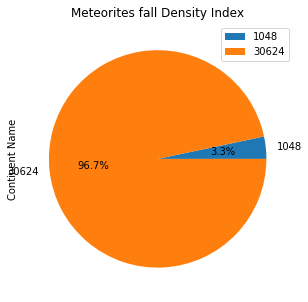

In [38]:
fall_vs_found()

### Meteorites seen v/s found per year 1975-2019

In [39]:
#Meteorites seen v/s found per year 1975-2019
def meteorites_seen_vs_found_by_year():
    meterorite_data = pd.DataFrame(meteorites_df, columns = ['id','fall', 'years'])
    meterorite_data[['year', 'date']] = meterorite_data['years'].str.split("-", n = 1, expand = True)
    meterorite_data = meterorite_data[meterorite_data['year'] > '1975']
    meterorite_data.replace(to_replace="Fell", value="Seen", inplace=True)
    # print(meterorite_data)

    met_df = meterorite_data.groupby(['fall','year']).size().unstack().T.fillna(0).astype(int)
    met_df = met_df.reset_index()
#     met_df.head(30)
    # met_df.plot(x=year, y=seen, figsize=(13,5))
    line_seen = plt.plot(met_df['year'],met_df['Seen'], marker='.', label="Seen")
    line_found = plt.plot(met_df['year'],met_df['Found'], marker='.', label="Found")
    plt.xticks(rotation='vertical', fontsize = 10)
    
    plt.xlabel('Year')
    plt.ylabel('Meteorites Count')
    plt.title("Meteorites seen v/s found per year 1975-2019")
#     plt.legend(handles=[line_seen, line_found], loc="best")
    plt.xlim("1976","2019")
    plt.legend()
    plt.tight_layout()
    plt.show()

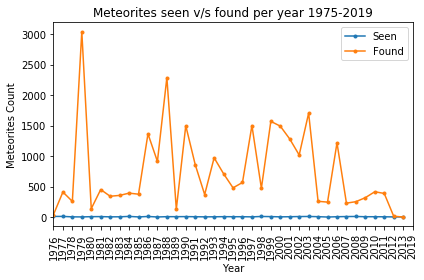

In [40]:
#Meteorites seen v/s found per year 1975-2019
meteorites_seen_vs_found_by_year()